# Assignment 1
# Use Case 1

In [21]:
import pandas as pd

# 1 
# a. Load the dataset prisoners.csv using pandas and display the first and last five rows.
# Load the dataset
data = pd.read_csv('prisoners.csv')

print("Info of the dataset:")
print(data.info())
print("-"*50)

print("Shape of the dataset:")
print(data.shape)
print("-"*50)

# Display the first five rows
print("First five rows of the dataset:")
print(data.head())
print("-"*50)

# Display the last five rows
print("\nLast five rows of the dataset:")
print(data.tail())


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   STATE/UT                                           35 non-null     object
 1   YEAR                                               35 non-null     int64 
 2   No. of Inmates benefitted by Elementary Education  35 non-null     int64 
 3   No. of Inmates benefitted by Adult Education       35 non-null     int64 
 4   No. of Inmates benefitted by Higher Education      35 non-null     int64 
 5   No. of Inmates benefitted by Computer Course       35 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.8+ KB
None
--------------------------------------------------
Shape of the dataset:
(35, 6)
--------------------------------------------------
First five rows of the dataset:
            STATE/UT  YEAR

In [22]:
# b. Describe the dataset and find the number of columns.

# Describe the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())

# Find the number of columns
num_columns = data.shape[1]
print(f"\nThe dataset has {num_columns} columns.")


Summary statistics of the dataset:
         YEAR  No. of Inmates benefitted by Elementary Education  \
count    35.0                                          35.000000   
mean   2013.0                                        1057.914286   
std       0.0                                        2078.196777   
min    2013.0                                           0.000000   
25%    2013.0                                           0.000000   
50%    2013.0                                         167.000000   
75%    2013.0                                        1294.500000   
max    2013.0                                        9480.000000   

       No. of Inmates benefitted by Adult Education  \
count                                     35.000000   
mean                                    1534.857143   
std                                     3022.110503   
min                                        0.000000   
25%                                        6.500000   
50%                  

In [23]:
# 1
# c. Rows with zero inmates
# We need to identify rows where all the columns containing the number of inmates (Elementary, Adult, Higher Education, and Computer Course) are zero.

# Find rows where all inmate counts are zero
zero_inmates = data.loc[
    (data['No. of Inmates benefitted by Elementary Education'] == 0) &
    (data['No. of Inmates benefitted by Adult Education'] == 0) &
    (data['No. of Inmates benefitted by Higher Education'] == 0) &
    (data['No. of Inmates benefitted by Computer Course'] == 0)
]

print("\nRows with zero inmates:")
print(zero_inmates)



Rows with zero inmates:
             STATE/UT  YEAR  \
1   Arunachal Pradesh  2013   
15            Manipur  2013   
18           Nagaland  2013   
22             Sikkim  2013   
30       D & N Haveli  2013   
31        Daman & Diu  2013   
33        Lakshadweep  2013   
34        Pondicherry  2013   

    No. of Inmates benefitted by Elementary Education  \
1                                                   0   
15                                                  0   
18                                                  0   
22                                                  0   
30                                                  0   
31                                                  0   
33                                                  0   
34                                                  0   

    No. of Inmates benefitted by Adult Education  \
1                                              0   
15                                             0   
18                       

In [24]:
# 2. Data Manipulation
# a. Create a new column total_benefitted

# Create a new column that sums the inmates benefitted through all modes
data['total_benefitted'] = data[
    [
        'No. of Inmates benefitted by Elementary Education',
        'No. of Inmates benefitted by Adult Education',
        'No. of Inmates benefitted by Higher Education',
        'No. of Inmates benefitted by Computer Course'
    ]
].sum(axis=1)

print("\nDataset after adding 'total_benefitted' column:")
print(data.head())




Dataset after adding 'total_benefitted' column:
            STATE/UT  YEAR  No. of Inmates benefitted by Elementary Education  \
0     Andhra Pradesh  2013                                               9480   
1  Arunachal Pradesh  2013                                                  0   
2              Assam  2013                                                676   
3              Bihar  2013                                               1693   
4        Chhatisgarh  2013                                               1664   

   No. of Inmates benefitted by Adult Education  \
0                                         13758   
1                                             0   
2                                           750   
3                                          3013   
4                                          1803   

   No. of Inmates benefitted by Higher Education  \
0                                            672   
1                                              0   
2

In [25]:
# 2. Data Manipulation
# b. Create a new row "totals"

# Add a new row 'totals' to show the sum across all states for each column
totals = data[
    [
        'No. of Inmates benefitted by Elementary Education',
        'No. of Inmates benefitted by Adult Education',
        'No. of Inmates benefitted by Higher Education',
        'No. of Inmates benefitted by Computer Course',
        'total_benefitted'
    ]
].sum()

totals_row = pd.DataFrame(
    [['Totals', '', totals[0], totals[1], totals[2], totals[3], totals[4]]],
    columns=data.columns
)

# Append the totals row to the dataset
data = pd.concat([data, totals_row], ignore_index=True)

print("\nDataset after adding 'totals' row:")
print(data.tail())



Dataset after adding 'totals' row:
       STATE/UT  YEAR  No. of Inmates benefitted by Elementary Education  \
31  Daman & Diu  2013                                                  0   
32        Delhi  2013                                               1458   
33  Lakshadweep  2013                                                  0   
34  Pondicherry  2013                                                  0   
35       Totals                                                    37027   

    No. of Inmates benefitted by Adult Education  \
31                                             0   
32                                          1187   
33                                             0   
34                                             0   
35                                         53720   

    No. of Inmates benefitted by Higher Education  \
31                                              0   
32                                            908   
33                                 

C:\Users\akram\AppData\Local\Temp\ipykernel_5552\2887224803.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [['Totals', '', totals[0], totals[1], totals[2], totals[3], totals[4]]],



State with maximum beneficiaries: Andhra Pradesh with 24080 inmates.


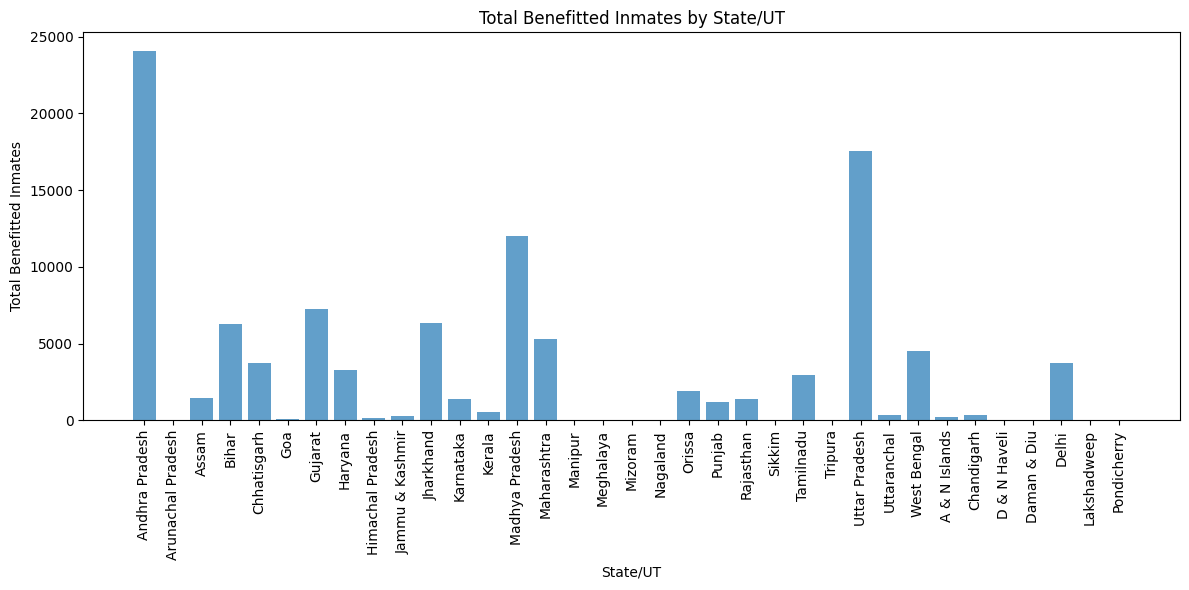

In [26]:
# 3. Plotting
# a. Bar Plot for States and Total Benefitted

import matplotlib.pyplot as plt

# Exclude the 'Totals' row for this plot
state_data = data[data['STATE/UT'] != 'Totals']

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(state_data['STATE/UT'], state_data['total_benefitted'], alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Total Benefitted Inmates')
plt.title('Total Benefitted Inmates by State/UT')

# Find the state with maximum beneficiaries
max_state = state_data.loc[state_data['total_benefitted'].idxmax()]
print(f"\nState with maximum beneficiaries: {max_state['STATE/UT']} with {max_state['total_benefitted']} inmates.")

plt.tight_layout()
plt.show()


    

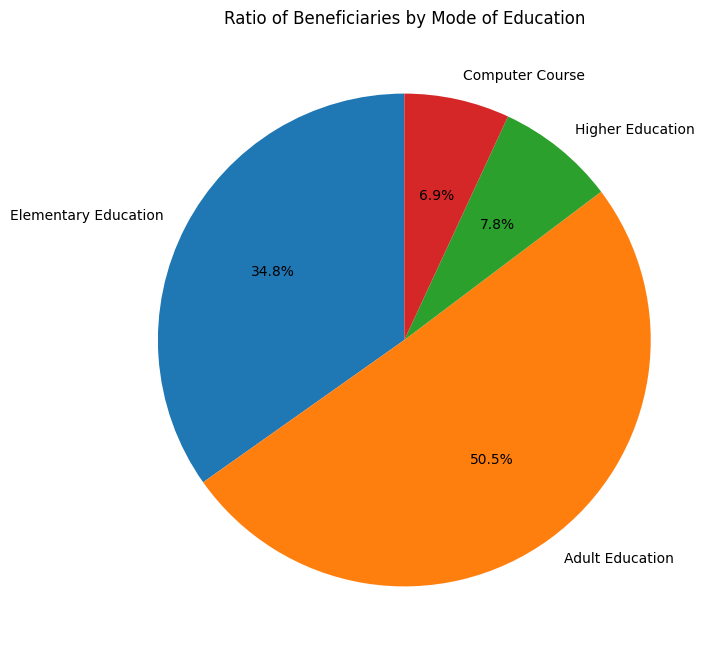

In [41]:
# 3. Plotting
# b. Pie Chart for Ratio Among Different Modes

# data.loc[row_filter, column_filter]
# Get the totals for each mode of benefit
benefit_totals = data.loc[data['STATE/UT'] == 'Totals', [
    'No. of Inmates benefitted by Elementary Education',
    'No. of Inmates benefitted by Adult Education',
    'No. of Inmates benefitted by Higher Education',
    'No. of Inmates benefitted by Computer Course'
]].values.flatten()

# Labels for the pie chart
labels = [
    'Elementary Education',
    'Adult Education',
    'Higher Education',
    'Computer Course'
]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(benefit_totals, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of Beneficiaries by Mode of Education')
plt.show()
